In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("TrainingInputFile.csv")

In [3]:
df

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cement                           1030 non-null   float64
 1   Blast Furnace Slag _component_2  1030 non-null   float64
 2   Fly Ash _component_3             1030 non-null   float64
 3   Water_component_4                1030 non-null   float64
 4   Superplasticizer_component_5     1030 non-null   float64
 5   Coarse Aggregate_component_6     1030 non-null   float64
 6   Fine Aggregate_component_7       1030 non-null   float64
 7   Age_day                          1030 non-null   int64  
 8   Concrete_compressive _strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [5]:
from pandas_profiling import ProfileReport
ProfileReport(df).to_file("Training_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df.describe()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
X = df.drop(columns=["Concrete_compressive _strength"])
y = df["Concrete_compressive _strength"]

In [8]:
#LogTransformation
for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Text(0, 0.5, 'WCSS')

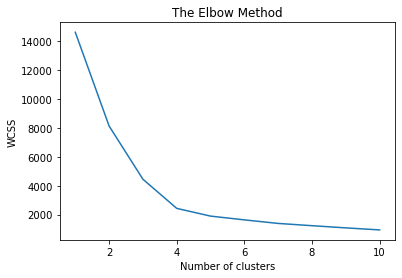

In [10]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
wcss = []
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42) # initializing the KMeans object
    kmeans.fit(X) # fitting the data to the KMeans Algorithm
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss) # creating the graph between WCSS and the number of clusters
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [11]:
number_of_clusters = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing').knee
kmeans = KMeans(n_clusters= number_of_clusters, random_state=0)
X["Clusters"] = kmeans.fit_predict(X)

In [12]:
X["Labels"] = y

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [17]:
def get_best_params_for_linearReg(X_train, y_train):
    param_grids = {
        "fit_intercept" : [True, False],
        "normalize" : [True, False],
        "copy_X" : [True, False]
    }
    grid = GridSearchCV(LinearRegression(), param_grids, n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)
    fit_intercept = grid.best_params_["fit_intercept"]
    normalize = grid.best_params_["normalize"]
    copy_X = grid.best_params_["copy_X"]
    linearReg = LinearRegression(fit_intercept=fit_intercept, normalize=normalize, copy_X=copy_X)
    linearReg.fit(X_train, y_train)
    return linearReg

In [20]:
def get_best_params_for_randomForest(X_train, y_train):
    param_grids = {
        "n_estimators" : [2,4,8,10,50,100,200,500],
        "max_features": ["auto", "sqrt", "log2"],
        "min_samples_split": [2,4,8],
        "bootstrap": [True, False]
    }
    grid = GridSearchCV(RandomForestRegressor(), param_grid=param_grids, n_jobs=-1, cv=5)
    grid.fit(X_train, y_train)
    n_estimators = grid.best_params_['n_estimators']
    max_features = grid.best_params_['max_features']
    min_samples_split = grid.best_params_['min_samples_split']
    bootstrap = grid.best_params_['bootstrap']
    randReg = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, min_samples_split=min_samples_split, bootstrap=bootstrap)
    randReg.fit(X_train, y_train)
    return randReg

In [27]:
def get_best_model(X_train, X_test, y_train, y_test):
    linearReg = get_best_params_for_linearReg(X_train, y_train)
    linearReg_score = r2_score(y_test, linearReg.predict(X_test))

    randForest = get_best_params_for_randomForest(X_train, y_train)
    randForest_score = r2_score(y_test, randForest.predict(X_test))

    if randForest_score > linearReg_score:
        return "RandomForestRegressor", randForest 
    else: 
        return "LinearRegression", linearReg


In [28]:
from sklearn.model_selection import train_test_split
list_of_clusters = X["Clusters"].unique()
list_of_models = []
for i in list_of_clusters:
    cluster_data = X[X["Clusters"]==i]
    cluster_features=cluster_data.drop(columns=['Labels','Clusters'])
    cluster_label= cluster_data['Labels']
    X_train, X_test, y_train, y_test = train_test_split(cluster_features, cluster_label, test_size= 1/3, random_state=0)
    best_model_name, best_model = get_best_model(X_train, X_test, y_train, y_test)
    print(f"Cluster number {i + 1}: {best_model}")
    list_of_models.append(best_model)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

Cluster number 3: RandomForestRegressor(max_features='sqrt', n_estimators=10)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

Cluster number 1: RandomForestRegressor(n_estimators=200)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

Cluster number 2: RandomForestRegressor(bootstrap=False, max_features='log2', n_estimators=500)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


Cluster number 4: RandomForestRegressor(bootstrap=False, max_features='log2')


In [31]:
df = pd.read_csv("TestingInputFile.csv")

In [32]:
df

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
279,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,3
280,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,14
281,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,28
282,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cement                           284 non-null    float64
 1   Blast Furnace Slag _component_2  284 non-null    float64
 2   Fly Ash _component_3             284 non-null    float64
 3   Water_component_4                284 non-null    float64
 4   Superplasticizer_component_5     284 non-null    float64
 5   Coarse Aggregate_component_6     284 non-null    float64
 6   Fine Aggregate_component_7       284 non-null    float64
 7   Age_day                          284 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 17.9 KB


In [34]:
ProfileReport(df).to_file("Testing_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
#LogTransfromation
for column in df.columns:
    df[column] += 1
    df[column] = np.log(df[column])

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(data=scaler.fit_transform(df), columns=df.columns)

In [39]:
df_scaled["Clusters"] = kmeans.predict(df_scaled)
clusters = df_scaled["Clusters"].unique()

In [43]:
result = []
for i in clusters:
    cluster_data = df_scaled[df_scaled["Clusters"]==i]
    cluster_features = cluster_data.drop(columns=["Clusters"])
    model = list_of_models[i]
    for val in model.predict(cluster_features.values):
        result.append(val)
final = pd.DataFrame(result, columns=["Prediction"])
final.to_csv("Predictions.csv", header=True)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
